In [1]:
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = yf.download('BTC-USD')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


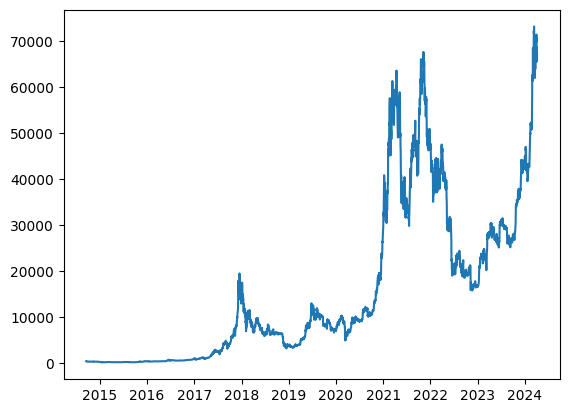

In [3]:
#plt.figure(figsize=(8,6))
plt.plot(df.index, df['Adj Close'])
plt.show()

In [4]:
# train test split
to_row = int(len(df)*0.9)
train_data = list(df[0:to_row]['Adj Close'])
test_data = list(df[to_row:]['Adj Close'])

In [5]:
model_predictions = []
n_test_obs = len(test_data)

In [7]:
for i in range(n_test_obs):
    model = ARIMA(train_data,order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    model_predictions.append(output[0])
    train_data.append(test_data[i])

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3488
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -28384.544
Date:                Fri, 05 Apr 2024   AIC                          56779.088
Time:                        10:17:31   BIC                          56809.872
Sample:                             0   HQIC                         56790.077
                               - 3488                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0453      0.008     -5.605      0.000      -0.061      -0.029
ar.L2          0.0072      0.009      0.843      0.399      -0.010       0.024
ar.L3          0.0411      0.009      4.401      0.0

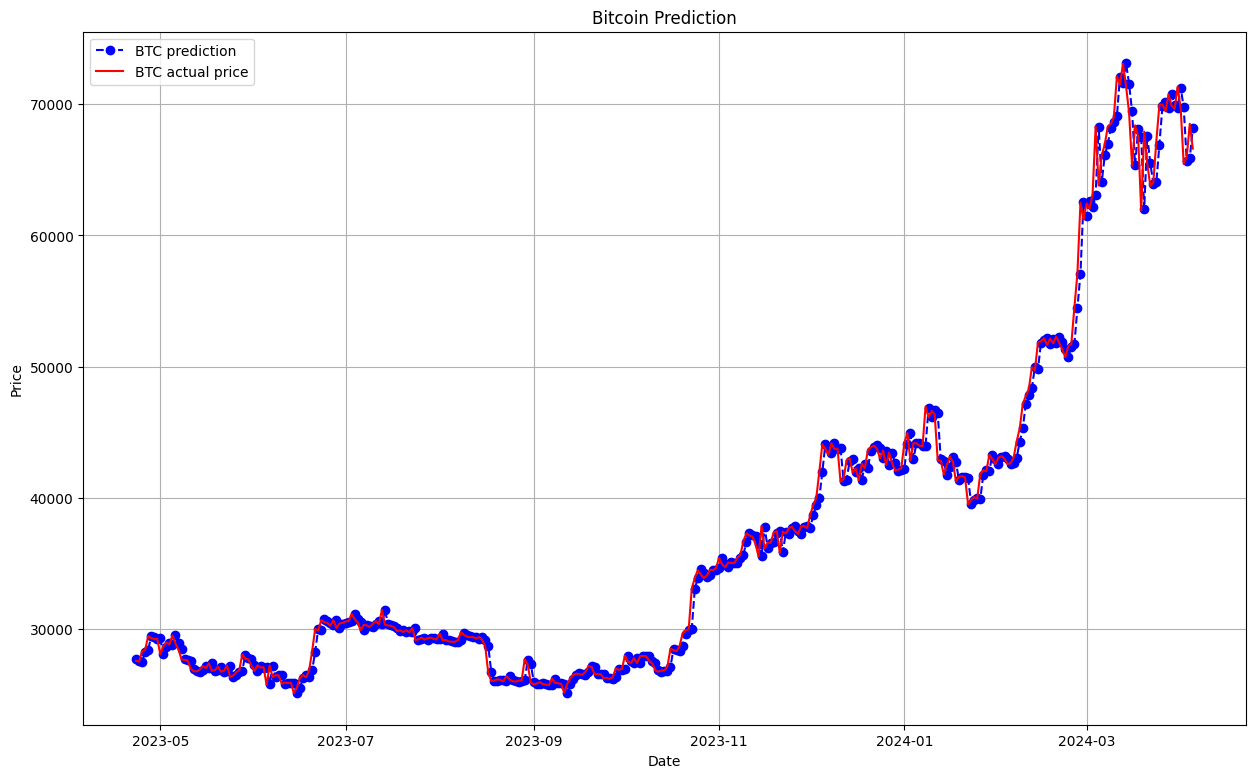

In [21]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='BTC prediction')
plt.plot(date_range, test_data, color='red', label='BTC actual price')

plt.title('Bitcoin Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()